In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

In [31]:
import pandas as pd
import numpy as np

df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    str  
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4), str(1)
memory usage: 7.9 KB


In [33]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [34]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [35]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [37]:
X = df.copy() 

from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=df.columns)

In [38]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [40]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.36156051651908966


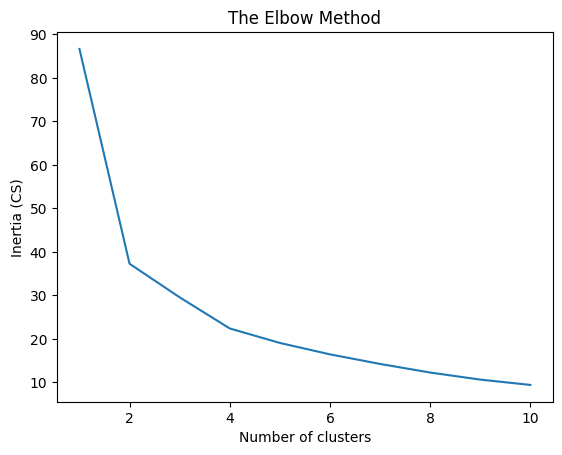

In [ ]:
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (CS)')
plt.show()

In [42]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)

The average silhouette score is : 0.43237265473772124


In [59]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(X)

labels = kmeans.labels_

In [60]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.3773792051558326


In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],
    'init': ['k-means++'],
    'max_iter': [100, 200, 300],
    'n_init': [10, 20]
}

kmeans = KMeans()
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X)
print("Best parameters:", grid_search.best_params_)
best_kmeans = grid_search.best_estimator_

predictions = best_kmeans.predict(X)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'init': 'k-means++', 'max_iter': 200, 'n_clusters': 6, 'n_init': 20}


In [68]:
silhouette_avg = silhouette_score(X, predictions)
print("Silhouette score:", silhouette_avg)

Silhouette score: 0.3776415902227895


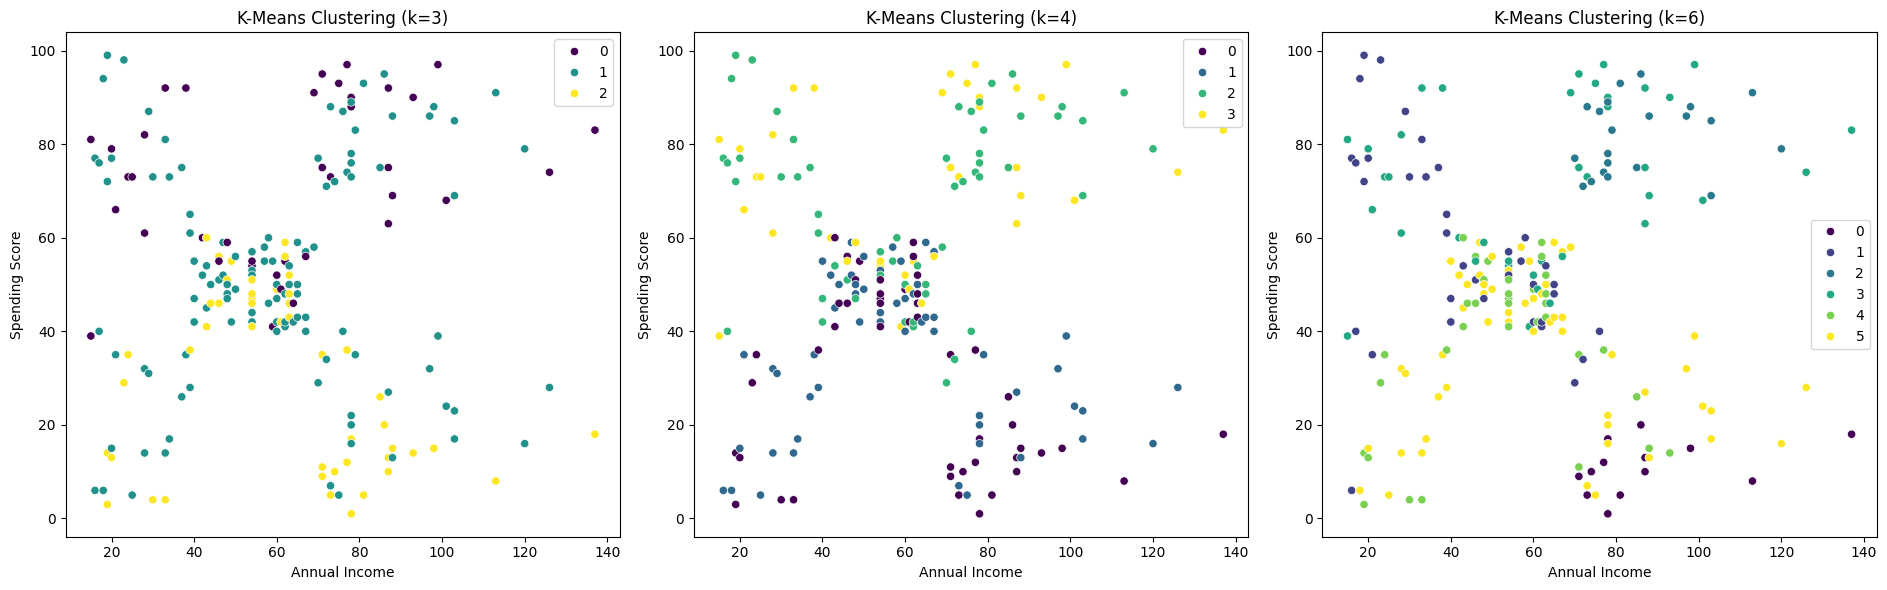

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_kmeans_comparison(k_values, data_scaled, original_df):
    plt.figure(figsize=(19, 6))
    
    for i, k in enumerate(k_values):
        model = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
        clusters = model.fit_predict(data_scaled)
        
        plt.subplot(1, 3, i+1)
        sns.scatterplot(
            x=original_df['Annual Income (k$)'], 
            y=original_df['Spending Score (1-100)'], 
            hue=clusters, 
            palette='viridis', 
            legend='full'
        )
        plt.title(f'K-Means Clustering (k={k})')
        plt.xlabel('Annual Income')
        plt.ylabel('Spending Score')
        
    plt.tight_layout()
    plt.show()

plot_kmeans_comparison([3, 4, 6], X, df)

HIERARCHICAL CLUSTERING

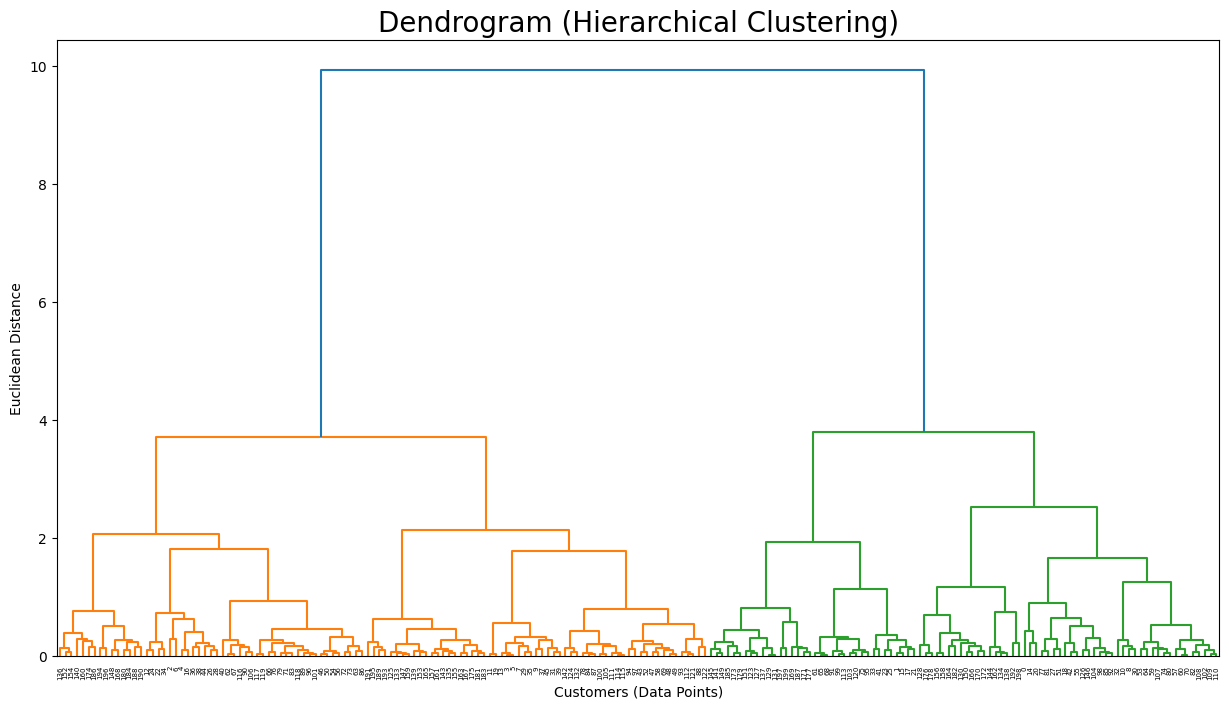

In [73]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

plt.title('Dendrogram (Hierarchical Clustering)', fontsize = 20)
plt.xlabel('Customers (Data Points)')
plt.ylabel('Euclidean Distance')
plt.show()

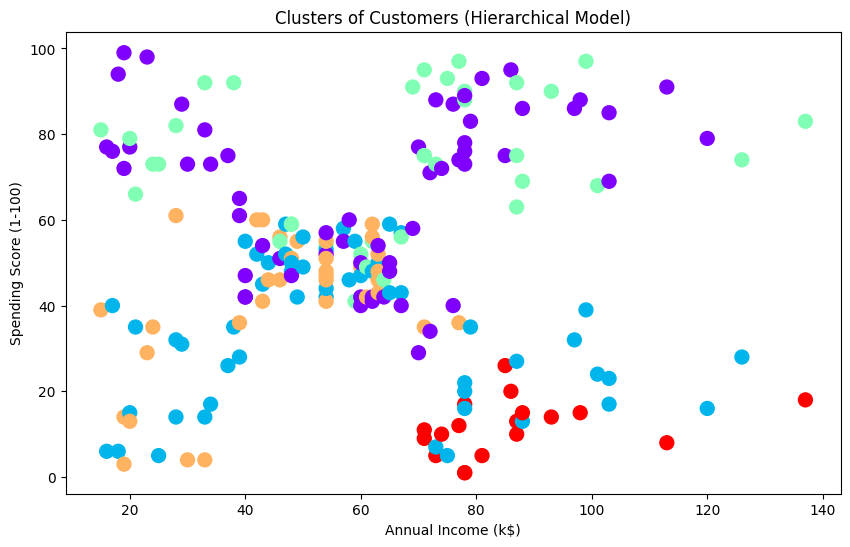

In [74]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_hc, s=100, cmap='rainbow')
plt.title('Clusters of Customers (Hierarchical Model)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

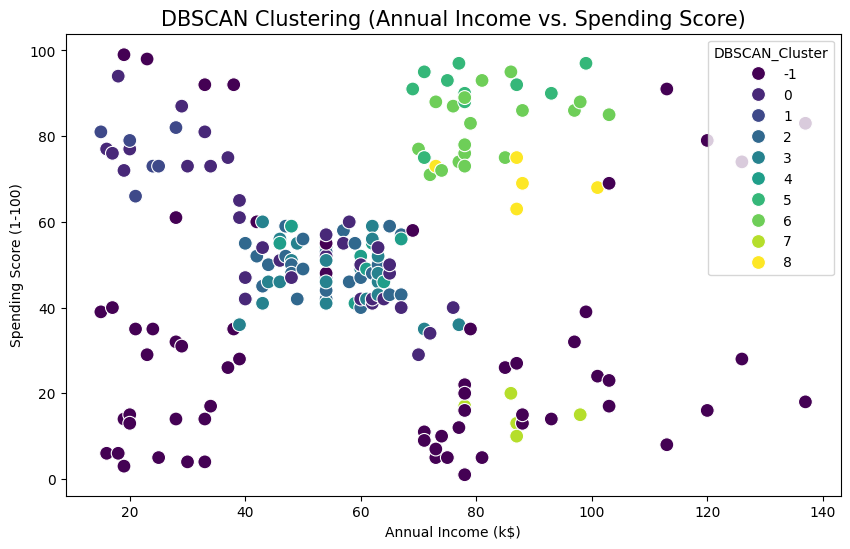

Number of clusters found: 9
Number of noise points (outliers): 65


In [75]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

dbscan = DBSCAN(eps=0.15, min_samples=5)

clusters = dbscan.fit_predict(X)

df['DBSCAN_Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Annual Income (k$)'], 
    y=df['Spending Score (1-100)'], 
    hue=df['DBSCAN_Cluster'], 
    palette='viridis', 
    s=100, 
    legend='full'
)

plt.title('DBSCAN Clustering (Annual Income vs. Spending Score)', fontsize=15)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points (outliers): {list(clusters).count(-1)}")